<a href="https://colab.research.google.com/github/anurvish/Scalable_Data/blob/main/modelRidge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import  cross_val_score
from sklearn.preprocessing import normalize,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

In [88]:
#reading the data from CSV file
df = pd.read_csv("/content/drive/MyDrive/ML/GroupProject/final_data.csv", )
df.head()
#Obtained data preprocessing
df = df.replace(np.NaN, 0)
df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
df.drop(labels=['release_date_main'],axis=1,inplace=True)
df.drop(labels=['id_main'],axis=1,inplace=True)
df.drop(labels=['runtime_main'],axis=1,inplace=True)
Independent_features = df.iloc[:,1:]
Target = df.iloc[:,0]
Independent_features = Independent_features.replace(np.nan,0)

In [89]:
#reading the data from CSV file
df = pd.read_csv("/content/drive/MyDrive/ML/GroupProject/final_data.csv", )
df.head()
#Obtained data preprocessing
df = df.replace(np.NaN, 0)
df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
df.drop(labels=['release_date_main'],axis=1,inplace=True)
df.drop(labels=['id_main'],axis=1,inplace=True)
df.drop(labels=['runtime_main'],axis=1,inplace=True)
Independent_features = df.iloc[:,1:]
Target = df.iloc[:,0]
Independent_features = Independent_features.replace(np.nan,0)

In [90]:
# calculate Variance inflation factor for the given data frame
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fitb
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})


In [91]:
#setting the max rows 
pd.set_option('max_rows', 99999)
df.head(5)

,revenue_main,adult_main,budget_main,Action_genre_main,Adventure_genre_main,Animation_genre_main,Comedy_genre_main,Crime_genre_main,Documentary_genre_main,Drama_genre_main,Family_genre_main,Fantasy_genre_main,History_genre_main,Horror_genre_main,Music_genre_main,Mystery_genre_main,Romance_genre_main,Science Fiction_genre_main,TV Movie_genre_main,Thriller_genre_main,War_genre_main,Western_genre_main,collection_popularity_coll_details,popularity_crew,0_gender_crew,1_gender_crew,2_gender_crew,3_gender_crew,Directing_relevance_crew,popularity_crew_2,0_gender_crew_2,1_gender_crew_2,2_gender_crew_2,3_gender_crew_2,Directing_relevance_crew_2,popularity_crew_3,0_gender_crew_3,1_gender_crew_3,2_gender_crew_3,3_gender_crew_3,Directing_relevance_crew_3,popularity_cast,2_gender_cast,1_gender_cast,0_gender_cast,3_gender_cast,Acting_relevance_cast,popularity_cast_2,2_gender_cast_2,1_gender_cast_2,0_gender_cast_2,3_gender_cast_2,Acting_relevance_cast_2,popularity_cast_3,2_gender_cast_3,1_gender_cast_3,0_gender_cast_3,3_gender_cast_3,Acting_relevance_cast_3,popularity_cast_4,2_gender_cast_4,1_gender_cast_4,0_gender_cast_4,3_gender_cast_4,Acting_relevance_cast_4,popularity_cast_5,2_gender_cast_5,1_gender_cast_5,0_gender_cast_5,3_gender_cast_5,Acting_relevance_cast_5
0,5303,False,130178,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,33.365000,0.631,0,0,1,0,1,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.600,1,0,0,0,1,0.600,1,0,0,0,1,0.000,0,0,0,0,0,0.600,0,1,0,0,1,1.452,1,0,0,0,1
1,7000000,False,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,27.062667,1.967,0,0,1,0,1,0.0,0,0,0,0,0,0.0,0,0,0,0,0,8.085,0,1,0,0,1,3.798,0,1,0,0,1,4.907,1,0,0,0,1,1.626,1,0,0,0,1,0.000,0,0,0,0,0
2,42000000,False,5000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.000000,0.751,0,0,1,0,1,0.0,0,0,0,0,0,0.0,0,0,0,0,0,5.795,1,0,0,0,1,1.638,0,1,0,0,1,2.547,1,0,0,0,1,0.872,1,0,0,0,1,0.000,0,0,0,0,0
3,8900000,False,7000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,13.355000,0.000,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,5.865,0,1,0,0,1,3.550,1,0,0,0,1,2.203,1,0,0,0,1,1.879,1,0,0,0,1,0.000,0,0,0,0,0
4,127345,False,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,5.375667,0.694,0,0,1,0,1,0.0,0,0,0,0,0,0.0,0,0,0,0,0,5.881,1,0,0,0,1,1.400,0,1,0,0,1,1.166,0,1,0,0,1,0.732,0,1,0,0,1,0.000,0,0,0,0,0


In [92]:
df_vif = calculate_vif(Independent_features,['budget_main','Action_genre_main',
       'Adventure_genre_main', 'Animation_genre_main', 'Comedy_genre_main',
       'Crime_genre_main', 'Documentary_genre_main', 'Drama_genre_main',
       'Family_genre_main', 'Fantasy_genre_main', 'History_genre_main',
       'Horror_genre_main', 'Music_genre_main', 'Mystery_genre_main',
       'Romance_genre_main', 'Science Fiction_genre_main',
       'TV Movie_genre_main', 'Thriller_genre_main', 'War_genre_main',
       'Western_genre_main', 'collection_popularity_coll_details','popularity_crew', '0_gender_crew', '1_gender_crew',
       '2_gender_crew','Directing_relevance_crew', 'popularity_crew_2',
       '0_gender_crew_2', '1_gender_crew_2', '2_gender_crew_2','Directing_relevance_crew_2', 'popularity_crew_3',
       '0_gender_crew_3', '1_gender_crew_3', '2_gender_crew_3','Directing_relevance_crew_3', 'popularity_cast',
       '2_gender_cast', '1_gender_cast', '0_gender_cast', '3_gender_cast',
       'Acting_relevance_cast', 'popularity_cast_2', '2_gender_cast_2',
       '1_gender_cast_2', '0_gender_cast_2', '3_gender_cast_2',
       'Acting_relevance_cast_2', 'popularity_cast_3', '2_gender_cast_3',
       '1_gender_cast_3', '0_gender_cast_3', '3_gender_cast_3',
       'Acting_relevance_cast_3', 'popularity_cast_4', '2_gender_cast_4',
       '1_gender_cast_4', '0_gender_cast_4', '3_gender_cast_4',
       'Acting_relevance_cast_4', 'popularity_cast_5', '2_gender_cast_5',
       '1_gender_cast_5', '0_gender_cast_5', '3_gender_cast_5',
       'Acting_relevance_cast_5'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as ap

In [93]:
Independent_features = Independent_features[['budget_main','Action_genre_main',
       'Adventure_genre_main', 'Animation_genre_main', 'Comedy_genre_main',
       'Crime_genre_main', 'Documentary_genre_main', 'Drama_genre_main',
       'Family_genre_main', 'Fantasy_genre_main', 'History_genre_main',
       'Horror_genre_main', 'Music_genre_main', 'Mystery_genre_main',
       'Romance_genre_main', 'Science Fiction_genre_main',
       'TV Movie_genre_main', 'Thriller_genre_main', 'War_genre_main',
       'Western_genre_main', 'collection_popularity_coll_details','popularity_crew', 'popularity_crew_2', 'popularity_crew_3', 'popularity_cast', 
       'popularity_cast_2', 'popularity_cast_3', 'popularity_cast_4', 'popularity_cast_5']]

In [94]:
mms_budget = MinMaxScaler()
mms_budget.fit(Independent_features['budget_main'].to_numpy().reshape(-1,1))

mms_revenue = MinMaxScaler()
mms_revenue.fit(Target.values.reshape(-1,1))

MinMaxScaler()

In [95]:
Independent_features['budget_main'] = mms_budget.fit_transform(Independent_features['budget_main'].to_numpy().reshape(-1,1))
Target = mms_revenue.fit_transform(Target.values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
#splitting the final data into train and test data 
xtrain, xtest, ytrain, ytest = train_test_split(Independent_features, Target, test_size=0.2)

In [97]:
C_para_r = [0.001, 0.005, 0.01, 0.05, 0.08, 0.1, 0.2, 0.5]
alpha_para_r = [1/(2*C) for C in C_para_r]

In [98]:
#Performing ridge regression on data
ridge_list = [Ridge(alpha=alpha) for alpha in alpha_para_r]
testPred_df = pd.DataFrame()
trainPred_df = pd.DataFrame()

for i, model in enumerate(ridge_list):
    model.fit(xtrain, ytrain)
    predCol = f'model_{i+1}'
    print(f'Model being processed {i}')
    print(f'Test Mean squared error: {mean_squared_error(ytest, model.predict(xtest))} & Mean Absulute error: {mean_absolute_error(ytest, model.predict(xtest))}')
    print(f'Train Mean squared error: {mean_squared_error(ytrain,  model.predict(xtrain))} & Mean Absulute error: {mean_absolute_error(ytrain,  model.predict(xtrain))}')
    #RMSC
    MSE_test = np.square(np.subtract(ytest, model.predict(xtest))).mean()
    MSE_train = np.square(np.subtract(ytrain, model.predict(xtrain))).mean()
    print(f'Test RMSC :{MSE_test}')
    print(f'Train RMSC: {MSE_train}')
    print("\n\n")

Model being processed 0
Test Mean squared error: 0.0022750069295291026 & Mean Absulute error: 0.02437246699237961
Train Mean squared error: 0.002151457185464234 & Mean Absulute error: 0.0241254554474141
Test RMSC :0.0022750069295291026
Train RMSC: 0.002151457185464234



Model being processed 1
Test Mean squared error: 0.0018744367482642435 & Mean Absulute error: 0.02209506282518842
Train Mean squared error: 0.0018285367453976908 & Mean Absulute error: 0.02211475843838305
Test RMSC :0.0018744367482642435
Train RMSC: 0.0018285367453976908



Model being processed 2
Test Mean squared error: 0.0016542797136434662 & Mean Absulute error: 0.02056893690571233
Train Mean squared error: 0.0016527840819613854 & Mean Absulute error: 0.020761902565511872
Test RMSC :0.0016542797136434662
Train RMSC: 0.0016527840819613854



Model being processed 3
Test Mean squared error: 0.0013338668850443275 & Mean Absulute error: 0.018316139357313743
Train Mean squared error: 0.0014180587436222057 & Mean Absulut

In [99]:
from sklearn.model_selection import  cross_val_score
#ploting the mean and standard daviation value for Ridge regression
RidgeKfold = {
'Score':[],
'StandardDeviation':[],
}
for i, model in enumerate(ridge_list):
    score = cross_val_score(model, Independent_features, Target, cv=5, scoring="neg_mean_squared_error")
    RidgeKfold['Score'].append(score.mean())
    RidgeKfold['StandardDeviation'].append(score.std())
    print(f'For model_{i} is mean score of {score.mean()} and standard deviation is {score.std()}')

RidgeKfold=pd.DataFrame(RidgeKfold)

For model_0 is mean score of -0.002584895040812124 and standard deviation is 0.002071702560885594
For model_1 is mean score of -0.002260239779703119 and standard deviation is 0.0017759056371531216
For model_2 is mean score of -0.0020290646979830586 and standard deviation is 0.0015956239879732514
For model_3 is mean score of -0.0016265900963927295 and standard deviation is 0.0012284140629946995
For model_4 is mean score of -0.0015760962564576632 and standard deviation is 0.0011706352133555393
For model_5 is mean score of -0.0015595381082549645 and standard deviation is 0.001150359202717465
For model_6 is mean score of -0.0015277918017377206 and standard deviation is 0.0011086635004474883
For model_7 is mean score of -0.001510333469427475 and standard deviation is 0.0010832596273115276


[0.001, 0.005, 0.01, 0.05, 0.08, 0.1, 0.2, 0.5]
[0.002584895040812124, 0.002260239779703119, 0.0020290646979830586, 0.0016265900963927295, 0.0015760962564576632, 0.0015595381082549645, 0.0015277918017377206, 0.001510333469427475]
[0.002071702560885594, 0.0017759056371531216, 0.0015956239879732514, 0.0012284140629946995, 0.0011706352133555393, 0.001150359202717465, 0.0011086635004474883, 0.0010832596273115276]


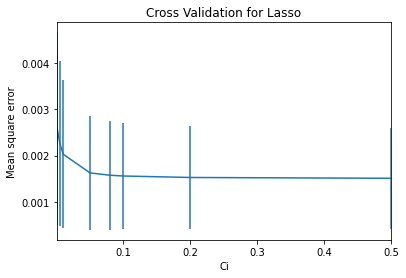

In [101]:
#ploting the mean and standard daviation value for Ridge Regression
mean_error=[]; std_error=[]
for model in ridge_list:
  temp=[]
  kf = KFold(n_splits=5)
  for train, test in kf.split(Independent_features):
    model.fit(Independent_features.iloc[train], Target[train])
    ypred = model.predict(Independent_features.iloc[test])
    temp.append(mean_squared_error(Target[test],ypred))
  mean_error.append(np.array(temp).mean())
  std_error.append(np.array(temp).std())

print(C_para_r)
print(mean_error)
print(std_error)
plt.errorbar(C_para_r,mean_error,yerr=std_error)
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.xlim((0.0001,0.5))
plt.title('Cross Validation for Lasso')
plt.show()